In [2]:
%load_ext tensorboard

In [72]:
%load_ext autoreload
%autoreload 2


import torch
import torchvision.models
from PIL import Image
import numpy as nps
import matplotlib.pyplot as plt
from lib.autoencoder import *
from lib.attention_model import AttentionLayer
from lib.correspondence_datamodule import CorrespondenceDataModule
from lib.warping import *
from externals.d2net.lib.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
pretrained_model = FeatureEncoder3Up() #.load_from_checkpoint("lightning_logs/version_3/checkpoints/epoch=50-step=7394.ckpt")
pretrained_model.freeze()

In [32]:
megadepth_path = "/mnt/c/Users/phill/polybox/Deep Learning/MegaDepthDataset"
data_module = CorrespondenceDataModule(base_path=megadepth_path, batch_size=1)
data_module.prepare_data()
data_module.setup(stage='fit')
dl_train = data_module.train_dataloader()
dl_val = data_module.val_dataloader()

  0%|          | 0/1 [00:00<?, ?it/s]

Building a new training dataset...


  0%|          | 0/1 [00:00<?, ?it/s]

Building the validation dataset...


100%|██████████| 1/1 [00:04<00:00,  4.09s/it]


In [56]:
batch = next(iter(dl_train))

In [74]:
y = pretrained_model(batch["image1"])

In [75]:
y.keys()

dict_keys(['early', 'middle', 'deep'])

In [76]:
y["early"].shape, y["middle"].shape, y["deep"].shape

(torch.Size([1, 32, 32, 32]),
 torch.Size([1, 32, 32, 32]),
 torch.Size([1, 32, 32, 32]))

(-0.5, 28.5, 28.5, -0.5)

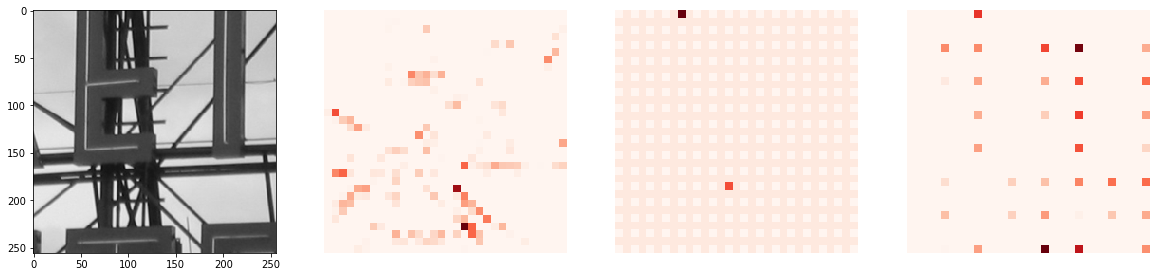

In [44]:
ye = y["early"].detach()
ym = y["middle"].detach()
yd = y["deep"].detach()
layer = 5
mycmap = 'Reds'
f, axarr = plt.subplots(1,4, figsize=(20,10)) 
_, channels, width, height = y["early"].shape
axarr[0].imshow(imshow_image(batch['image1'][0].cpu().numpy()))
# axarr[2].imshow(batch["image1"][0])
# axarr[2].axis('off')
axarr[1].imshow(ye[0,layer,:,:], cmap=mycmap)
axarr[1].axis('off')
axarr[2].imshow(ym[0,layer,:,:], cmap=mycmap)
axarr[2].axis('off')
axarr[3].imshow(yd[0,layer,:,:], cmap=mycmap)
axarr[3].axis('off')

In [5]:
arr = np.arange(9).reshape((3, 3))
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [29]:
t = torch.rand(3,10)

idx = torch.randperm(t.shape[0])
t = t[idx].view(t.size())
t

n = 3
k = 2
d = 5

rand_mat = torch.rand(n, d)
k_th_quant = torch.topk(rand_mat, k, largest = False)[0][:,-1:]
mask = rand_mat <= k_th_quant

my_mat = torch.rand(n, d)
my_mat.shape
print(my_mat)
print(mask)
print(torch.masked_select(my_mat, mask))
print(torch.masked_select(my_mat, mask).view(n,k))

tensor([[0.5652, 0.7819, 0.5957, 0.3146, 0.6441],
        [0.9556, 0.7190, 0.3018, 0.7634, 0.3546],
        [0.2302, 0.5621, 0.6481, 0.5693, 0.2048]])
tensor([[False, False,  True,  True, False],
        [False, False,  True,  True, False],
        [False,  True, False,  True, False]])
tensor([0.5957, 0.3146, 0.3018, 0.7634, 0.5621, 0.5693])
tensor([[0.5957, 0.3146],
        [0.3018, 0.7634],
        [0.5621, 0.5693]])
